In [2]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import vector
import dask_awkward as dak
import hist

Welcome to JupyROOT 6.30/07


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [3]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import Produce_Cutflow
import Processing_Helpers


In [4]:
#HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/signal_displacedHNL/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/signal_tau_mN2_ct1000/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)
signal_events

/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
        is partitionwise-compatible with dask.awkward<getitem-repacked, npartitions=1>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


dask.awkward<with-field, npartitions=1>

In [5]:
HNL_2GeV_10ctau_path_Run2 = "/uscms/home/amalbert/nobackup/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_tauType_mHNL2p0_pl1000.root"
signal_events_Run2  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path_Run2)

AttributeError: nCscRechitClusters not in fields.

In [ ]:
### NOTE: for this sample in data, the tau energy branch is messed up ###




data_path_base = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_noEtaCut/"

data_samples = ["Muon0-Run2024B-PromptReco-v1",
    "Muon0-Run2024C-PromptReco-v1",
    "Muon0-Run2024D-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v2",
    "Muon0-Run2024F-PromptReco-v1",
    "Muon0-Run2024G-PromptReco-v1",
    "Muon0-Run2024H-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v2",
    "Muon1-Run2024B-PromptReco-v1",
    "Muon1-Run2024C-PromptReco-v1",
    "Muon1-Run2024D-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v2",
    "Muon1-Run2024F-PromptReco-v1",
    "Muon1-Run2024G-PromptReco-v1",
    "Muon1-Run2024H-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v2"
    ]

data_events_list = [data_path_base+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events  = MuonSystemReader.loadTree_nanoFactory(data_events_list)


NameError: name 'MuonSystemReader' is not defined

In [ ]:
data_events.fields

['runNum',
 'MC_condition',
 'lumiSec',
 'evtNum',
 'mH',
 'mX',
 'ctau',
 'HLT_CSCCSC',
 'HLT_CSCDT',
 'HLT_CscCluster100_PNetTauhPFJet10_Loose',
 'HLT_CscCluster100_Ele5',
 'HLT_CscCluster100_Mu5',
 'HLT_CscCluster50_Photon30Unseeded',
 'HLT_CscCluster50_Photon20Unseeded',
 'HLT_PFMET120_PFMHT120_IDTight',
 'jetVeto',
 'npv',
 'npu',
 'weight',
 'pileupWeight',
 'pileupWeightUp',
 'pileupWeightDown',
 'Flag_eeBadScFilter',
 'Flag_BadPFMuonFilter',
 'Flag_hfNoisyHitsFilter',
 'Flag_BadPFMuonDzFilter',
 'Flag_globalSuperTightHalo2016Filter',
 'Flag_EcalDeadCellTriggerPrimitiveFilter',
 'Flag_goodVertices',
 'Flag_all',
 'Flag_ecalBadCalibFilter',
 'LHEScaleWeight',
 'MetTriggerEffDown',
 'MetTriggerEffUp',
 'MetTriggerEff',
 'rho',
 'met',
 'metPhi',
 'Puppimet',
 'PuppimetPhi',
 'PuppimetJESUp',
 'PuppimetPhiJESUp',
 'PuppimetJESDown',
 'PuppimetPhiJESDown',
 'metJESUp',
 'metJESDown',
 'metPhiJESUp',
 'metPhiJESDown',
 'gHiggsPt',
 'gHiggsE',
 'gHiggsEta',
 'gHiggsPhi',
 'nCscRings',

In [5]:
importlib.reload(MuonSystemReader)
importlib.reload(Produce_Cutflow)

<module 'Produce_Cutflow' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/Produce_Cutflow.py'>

In [ ]:
#both rings
Produce_Cutflow.makeCutflow(signal_events, cfg='cuts_signal.yaml', isMC=True)

forward veto eff:  0.6254826254826255


,Cut Name,Number of Events,Cut Efficiency,"Cumulative Efficiency, Accepted Events"
0,LLP Decay in CSCs,29777,0.065,1
1,CSC Rechit Cluster Matched to LLP,7265,0.244,0.244
2,>100 rechits in CSC Cluster,5161,0.710,0.173
3,>1 GenVisTau,2586,0.501,0.087
4,>1 tau,1197,0.463,0.040
5,"DeltaR(genVisTau, reco tau)<0.2",1045,0.873,0.035
6,tau pass looseID,518,0.496,0.017
7,Pass Trigger,166,0.320,0.006


In [ ]:
#just inner ring
Produce_Cutflow.makeCutflow(signal_events, cfg='cuts_signal.yaml', isMC=True)

forward veto eff:  0.6833333333333333


,Cut Name,Number of Events,Cut Efficiency,"Cumulative Efficiency, Accepted Events"
0,LLP Decay in CSCs,29777,0.065,1
1,CSC Rechit Cluster Matched to LLP,7265,0.244,0.244
2,Cluster Centroid in Inner Ring,1813,0.250,0.061
3,>100 rechits in CSC Cluster,1470,0.811,0.049
4,>1 GenVisTau,762,0.518,0.026
5,>1 tau,312,0.409,0.010
6,"DeltaR(genVisTau, reco tau)<0.2",256,0.821,0.009
7,tau pass looseID,120,0.469,0.004
8,Pass Trigger,19,0.158,0.001


In [ ]:
#just ME13 (should have 100% efficiency!)
#just inner ring
Produce_Cutflow.makeCutflow(signal_events, cfg='cuts_signal.yaml', isMC=True)

forward veto eff:  1.0


,Cut Name,Number of Events,Cut Efficiency,"Cumulative Efficiency, Accepted Events"
0,LLP Decay in CSCs,29777,0.065,1
1,CSC Rechit Cluster Matched to LLP,7265,0.244,0.244
2,Cluster Centriod in ME13,160,0.022,0.005
3,>100 rechits in CSC Cluster,92,0.575,0.003
4,>1 GenVisTau,40,0.435,0.001
5,>1 tau,26,0.650,0.001
6,"DeltaR(genVisTau, reco tau)<0.2",24,0.923,0.001
7,tau pass looseID,13,0.542,0.000
8,Pass Trigger,9,0.692,0.000


In [ ]:
Produce_Cutflow.makeCutflow(signal_events_Run2, cfg='cuts_signal_Run2.yaml', isMC=True, Run=2)

LLP_matched_CSCCluster
mask type:  var * bool
cscCluster cscCluster
event cscCluster
cscClusterSize>100
mask type:  var * bool
cscCluster cscCluster
event cscCluster
tau_matchedGenTauIsVisTau
has_reco_tau
tau_matchGenTau
tau_looseID
pass_trigger


,Cut Name,Number of Events,Cut Efficiency,"Cumulative Efficiency, Accepted Events"
0,LLP Decay in CSCs,7378,0.040,1
1,CSC Rechit Cluster Matched to LLP,2286,0.310,0.310
2,>100 rechits in CSC Cluster,1614,0.706,0.219


In [ ]:
Produce_Cutflow.makeCutflow(data_events, cfg='cuts_data.yaml', isMC=False)

,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760,1.000,1.000
1,>1 CSC Rechit Cluster,7744760,1.000,1.000
2,>1 tau,7744760,1.000,1.000
3,tau pass looseID,625498,0.081,0.081


In [8]:
Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_signal_invertTauId.yaml', isMC=True)

0.9282708
forward veto eff:  0.011621048431516266


,Cut Name,Number of Events,Cut Efficiency,"Cumulative Efficiency, Accepted Events"
0,Pass Trigger,621.013165,0.001,0.001
1,>1 CSC Cluster,621.013165,1.000,0.001
2,Muon Veto pT < 30 GeV,601.519478,0.969,0.001
3,Jet Veto pT < 30 GeV,596.878124,0.992,0.001
4,>1 tau,388.945465,0.652,0.001
5,tau pT>18GeV,380.591028,0.979,0.001
6,fail tauLooseId,246.920033,0.649,0.001


In [6]:
Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_data_invertTauId.yaml', isMC=False)

KeyboardInterrupt: 

In [6]:
cutflow, dPhiHist = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)

496100
dask.awkward<sum, type=Scalar, dtype=float32>
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


In [7]:
cutflow

,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,145.94904,0.001,0.001
1,MET>30 GeV,101.44440,0.695,0.001
2,>160 rechits in CSC Cluster,80.06472,0.789,0.001
3,MuonVetoPt<30GeV,77.88312,0.973,0.001
4,JetVetoPt<30 GeV,77.44680,0.994,0.001
5,"|dPhi(cluster, MET)|<1.5",68.06592,0.879,0.001
6,>1 tau,44.06832,0.647,0.000
7,tauPt>30GeV,24.21576,0.550,0.000
8,tau pass looseID,11.56248,0.477,0.000
9,"|dEta(cluster, tau)|<2",11.34432,0.981,0.000


In [11]:
cutflow_10mm, dPhiHist = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True, reweight_ctau=10)

496100
492209.38
[[8.98e-07], [3.52e-12], [0], [4.69], ..., [0], [0], [1.24e-06], [1.19e-16]]
496101.03
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


In [12]:
cutflow_10mm

,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,6.752836,0.000,0.000
1,MET>30 GeV,6.666652,0.987,0.000
2,>160 rechits in CSC Cluster,6.159569,0.924,0.000
3,MuonVetoPt<30GeV,6.156714,1.000,0.000
4,JetVetoPt<30 GeV,6.156714,1.000,0.000
5,"|dPhi(cluster, MET)|<1.5",6.099925,0.991,0.000
6,>1 tau,4.400351,0.721,0.000
7,tauPt>30GeV,1.726637,0.392,0.000
8,tau pass looseID,0.007731,0.004,0.000
9,"|dEta(cluster, tau)|<2",0.007712,0.001,0.000


In [13]:
cutflow_50mm, dPhiHist = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True, reweight_ctau=50)
cutflow_50mm

496100
498356.25
[[0.568], [0.0521], [1.54e-08], [11.1], ..., [9.29e-11], [0.604], [0.00722]]
496102.56
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,137.656204,0.001,0.001
1,MET>30 GeV,115.350609,0.838,0.001
2,>160 rechits in CSC Cluster,101.953729,0.884,0.001
3,MuonVetoPt<30GeV,99.509255,0.976,0.001
4,JetVetoPt<30 GeV,99.362260,0.999,0.001
5,"|dPhi(cluster, MET)|<1.5",93.288526,0.939,0.001
6,>1 tau,49.721852,0.533,0.000
7,tauPt>30GeV,21.977038,0.442,0.000
8,tau pass looseID,7.336955,0.334,0.000
9,"|dEta(cluster, tau)|<2",7.039120,0.609,0.000


In [14]:
cutflow_100mm, dPhiHist = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True, reweight_ctau=100)
cutflow_100mm

496100
498121.88
[[1.85], [0.596], [0.000481], [7.54], ..., [4.27e-05], [1.9], [0.234]]
496105.62
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,252.493196,0.003,0.003
1,MET>30 GeV,199.218934,0.789,0.002
2,>160 rechits in CSC Cluster,169.752128,0.852,0.002
3,MuonVetoPt<30GeV,164.942955,0.972,0.002
4,JetVetoPt<30 GeV,164.443546,0.997,0.002
5,"|dPhi(cluster, MET)|<1.5",151.485130,0.921,0.002
6,>1 tau,88.334780,0.583,0.001
7,tauPt>30GeV,42.836363,0.485,0.000
8,tau pass looseID,18.065348,0.422,0.000
9,"|dEta(cluster, tau)|<2",17.454822,1.510,0.000


In [15]:
cutflow_500mm, dPhiHist = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True, reweight_ctau=500)
cutflow_500mm

496100
496648.62
[[1.66], [1.46], [0.662], [1.94], [1.36], ..., [0.748], [0.506], [1.66], [1.32]]
496096.5
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,228.222896,0.002,0.002
1,MET>30 GeV,162.351585,0.711,0.002
2,>160 rechits in CSC Cluster,129.797184,0.799,0.001
3,MuonVetoPt<30GeV,126.233922,0.973,0.001
4,JetVetoPt<30 GeV,125.573823,0.995,0.001
5,"|dPhi(cluster, MET)|<1.5",111.365114,0.887,0.001
6,>1 tau,71.198814,0.639,0.001
7,tauPt>30GeV,38.438243,0.540,0.000
8,tau pass looseID,18.204612,0.474,0.000
9,"|dEta(cluster, tau)|<2",17.826110,1.542,0.000


In [16]:
cutflow_5000mm, dPhiHist = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True, reweight_ctau=5000)
cutflow_5000mm

496100
515845.44
[[0.223], [0.247], [0.465], [0.197], ..., [0.422], [0.577], [0.223], [0.268]]
496008.75
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,34.729151,0.000,0.000
1,MET>30 GeV,23.579401,0.679,0.000
2,>160 rechits in CSC Cluster,18.378537,0.779,0.000
3,MuonVetoPt<30GeV,17.878806,0.973,0.000
4,JetVetoPt<30 GeV,17.773154,0.994,0.000
5,"|dPhi(cluster, MET)|<1.5",15.489490,0.872,0.000
6,>1 tau,10.131176,0.654,0.000
7,tauPt>30GeV,5.651443,0.558,0.000
8,tau pass looseID,2.712222,0.480,0.000
9,"|dEta(cluster, tau)|<2",2.665247,0.231,0.000


In [17]:
cutflow_10000mm, dPhiHist = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True, reweight_ctau=10000)
cutflow_10000mm

496100
468557.44
[[0.125], [0.14], [0.286], [0.109], ..., [0.256], [0.364], [0.125], [0.154]]
496217.2
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,19.659741,0.000,0.000
1,MET>30 GeV,13.301820,0.677,0.000
2,>160 rechits in CSC Cluster,10.349554,0.778,0.000
3,MuonVetoPt<30GeV,10.068113,0.973,0.000
4,JetVetoPt<30 GeV,10.008229,0.994,0.000
5,"|dPhi(cluster, MET)|<1.5",8.712405,0.871,0.000
6,>1 tau,5.705785,0.655,0.000
7,tauPt>30GeV,3.189000,0.559,0.000
8,tau pass looseID,1.531285,0.480,0.000
9,"|dEta(cluster, tau)|<2",1.505060,0.130,0.000


### With station-ring specific cuts

In [93]:
cutflow_hitscuts, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_hitscuts

496100
496100.0
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,145.94904,0.001,0.001
1,MET>30 GeV,101.44440,0.695,0.001
2,no hits +ME13,95.33592,0.940,0.001
3,no hits -ME13,89.22744,0.936,0.001
4,no hits +ME21,83.33712,0.934,0.001
5,no hits -ME21,77.22864,0.927,0.001
6,|maxStation|>2,56.50344,0.732,0.001
7,NStation10>1,25.74288,0.456,0.000
8,>160 rechits in CSC Cluster,22.47048,0.873,0.000
9,MuonVetoPt<30GeV,21.81600,0.971,0.000


In [94]:
cutflow_hitscuts_data, dPhiHist, cumulative_events = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_hitscuts_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760.0,1.000,1.000
1,MET>30 GeV,4064216.0,0.525,0.525
2,no hits +ME13,3862140.0,0.950,0.499
3,no hits -ME13,3649374.0,0.945,0.471
4,no hits +ME21,3430069.0,0.940,0.443
5,no hits -ME21,3197785.0,0.932,0.413
6,|maxStation|>2,1073002.0,0.336,0.139
7,NStation10>1,118180.0,0.110,0.015
8,>160 rechits in CSC Cluster,54533.0,0.461,0.007
9,MuonVetoPt<30GeV,46835.0,0.859,0.006


In [8]:
cutflow_nohitscuts_maxStation, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_nohitscuts_maxStation

496100
496100.0
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,145.94904,0.001,0.001
1,MET>30 GeV,101.44440,0.695,0.001
2,>160 rechits in CSC Cluster,80.06472,0.789,0.001
3,|maxStation|>2,44.94096,0.561,0.000
4,MuonVetoPt<30GeV,44.28648,0.985,0.000
5,JetVetoPt<30 GeV,43.85016,0.990,0.000
6,"|dPhi(cluster, MET)|<1.5",39.26880,0.896,0.000
7,>1 tau,26.61552,0.678,0.000
8,tauPt>30GeV,16.14384,0.607,0.000
9,tau pass looseID,7.19928,0.446,0.000


In [9]:
cutflow_maxStation_data, dPhiHist, cumulative_events = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_maxStation_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760.0,1.000,1.000
1,MET>30 GeV,4064216.0,0.525,0.525
2,>160 rechits in CSC Cluster,1551694.0,0.382,0.200
3,|maxStation|>2,404153.0,0.260,0.052
4,MuonVetoPt<30GeV,390137.0,0.965,0.050
5,JetVetoPt<30 GeV,329065.0,0.843,0.042
6,"|dPhi(cluster, MET)|<1.5",160200.0,0.487,0.021
7,>1 tau,160200.0,1.000,0.021
8,tauPt>30GeV,49380.0,0.308,0.006
9,tau pass looseID,4145.0,0.084,0.001


In [96]:
cutflow_noNStation10, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_noNStation10

496100
496100.0
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,145.94904,0.001,0.001
1,MET>30 GeV,101.44440,0.695,0.001
2,no hits +ME13,95.33592,0.940,0.001
3,no hits -ME13,89.22744,0.936,0.001
4,no hits +ME21,83.33712,0.934,0.001
5,no hits -ME21,77.22864,0.927,0.001
6,|maxStation|>2,56.50344,0.732,0.001
7,>160 rechits in CSC Cluster,42.97752,0.761,0.000
8,MuonVetoPt<30GeV,42.32304,0.985,0.000
9,JetVetoPt<30 GeV,41.88672,0.990,0.000


In [6]:
cutflow_noNStation10_data, dPhiHist, events = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_noNStation10_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760.0,1.000,1.000
1,MET>30 GeV,4064216.0,0.525,0.525
2,no hits +ME13,3862140.0,0.950,0.499
3,no hits -ME13,3649374.0,0.945,0.471
4,no hits +ME21,3430069.0,0.940,0.443
5,no hits -ME21,3197785.0,0.932,0.413
6,|maxStation|>2,1073002.0,0.336,0.139
7,>160 rechits in CSC Cluster,261925.0,0.244,0.034
8,MuonVetoPt<30GeV,251321.0,0.960,0.032
9,JetVetoPt<30 GeV,207411.0,0.825,0.027


In [10]:
cutflow_NStation10_maxStation, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_NStation10_maxStation

496100
496100.0
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,145.94904,0.001,0.001
1,MET>30 GeV,101.44440,0.695,0.001
2,>160 rechits in CSC Cluster,80.06472,0.789,0.001
3,|maxStation|>2,44.94096,0.561,0.000
4,NStation10>1,24.43392,0.544,0.000
5,MuonVetoPt<30GeV,23.77944,0.973,0.000
6,JetVetoPt<30 GeV,23.56128,0.991,0.000
7,"|dPhi(cluster, MET)|<1.5",21.37968,0.907,0.000
8,>1 tau,15.05304,0.704,0.000
9,tauPt>30GeV,9.38088,0.623,0.000


In [11]:
cutflow_NStation10_maxStation_data, dPhiHist, events = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_NStation10_maxStation_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760.0,1.000,1.000
1,MET>30 GeV,4064216.0,0.525,0.525
2,>160 rechits in CSC Cluster,1551694.0,0.382,0.200
3,|maxStation|>2,404153.0,0.260,0.052
4,NStation10>1,155612.0,0.385,0.020
5,MuonVetoPt<30GeV,145123.0,0.933,0.019
6,JetVetoPt<30 GeV,109092.0,0.752,0.014
7,"|dPhi(cluster, MET)|<1.5",53267.0,0.488,0.007
8,>1 tau,53267.0,1.000,0.007
9,tauPt>30GeV,16634.0,0.312,0.002


In [12]:
cutflow_NStation10_noStation2, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_NStation10_noStation2

496100
496100.0
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,145.94904,0.001,0.001
1,MET>30 GeV,101.44440,0.695,0.001
2,>160 rechits in CSC Cluster,80.06472,0.789,0.001
3,no hits +ME13,76.57416,0.956,0.001
4,no hits -ME13,71.55648,0.934,0.001
5,no hits +ME21,65.44800,0.915,0.001
6,no hits -ME21,59.99400,0.917,0.001
7,no hits +ME22,48.64968,0.811,0.000
8,no hits -ME22,39.48696,0.812,0.000
9,NStation10>1,19.63440,0.497,0.000


In [ ]:
cutflow_NStation10_noStation2_data, dPhiHist, events = Produce_Cutflow.ma0keCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_NStation10_noStation2_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760.0,1.000,1.000
1,MET>30 GeV,4064216.0,0.525,0.525
2,>160 rechits in CSC Cluster,1551694.0,0.382,0.200
3,no hits +ME13,1492256.0,0.962,0.193
4,no hits -ME13,1428716.0,0.957,0.184
5,no hits +ME21,1236534.0,0.865,0.160
6,no hits -ME21,1067955.0,0.864,0.138
7,no hits +ME22,656890.0,0.615,0.085
8,no hits -ME22,241605.0,0.368,0.031
9,NStation10>1,33128.0,0.137,0.004


In [ ]:
cutflow_NStation10_noStation22, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_NStation10_noStation22

496100
496100.0
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,145.94904,0.001,0.001
1,MET>30 GeV,101.44440,0.695,0.001
2,>160 rechits in CSC Cluster,80.06472,0.789,0.001
3,no hits +ME22,67.62960,0.845,0.001
4,no hits -ME22,56.93976,0.842,0.001
5,NStation10>1,25.52472,0.448,0.000
6,MuonVetoPt<30GeV,25.08840,0.983,0.000
7,JetVetoPt<30 GeV,24.87024,0.991,0.000
8,"|dPhi(cluster, MET)|<1.5",22.25232,0.895,0.000
9,>1 tau,15.27120,0.686,0.000


In [15]:
cutflow_NStation10_noStation22_data, dPhiHist, events = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_NStation10_noStation22_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760.0,1.000,1.000
1,MET>30 GeV,4064216.0,0.525,0.525
2,>160 rechits in CSC Cluster,1551694.0,0.382,0.200
3,no hits +ME22,1105568.0,0.712,0.143
4,no hits -ME22,653582.0,0.591,0.084
5,NStation10>1,165355.0,0.253,0.021
6,MuonVetoPt<30GeV,157766.0,0.954,0.020
7,JetVetoPt<30 GeV,118964.0,0.754,0.015
8,"|dPhi(cluster, MET)|<1.5",57325.0,0.482,0.007
9,>1 tau,57325.0,1.000,0.007


In [28]:
ctaus = [10, 50, 100, 500, 1000, 5000, 10000]
signal_yields = []
for ctau in ctaus:
    print(ctau, "mm")
    cutflow, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True, reweight_ctau=ctau)
    signal_yield = cutflow["Number of Events"][len(cutflow)-1]
    print(signal_yield)
    signal_yields.append(signal_yield)

10 mm
496100
492209.38
[[8.98e-07], [3.52e-12], [0], [4.69], ..., [0], [0], [1.24e-06], [1.19e-16]]
496101.03
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event
0.0001228686475753784
50 mm
496100
498356.25
[[0.568], [0.0521], [1.54e-08], [11.1], ..., [9.29e-11], [0.604], [0.00722]]
496102.56
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event
1.3663476294708252
100 mm
496100
498121.88
[[1.85], [0.596], [0.000481], [7.54], ..., [4.27e-05], [1.9], [0.234]]
496105.62
0.21816
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event
4.119311260986328
500 mm
496100
496648.62
[[1.66], [1.46], [0.662], [1.94], [1.36], ..., [0.748], [0.506], [1.66], [1.32]]
496096.5
0.21816
computing delta Eta cartesian
tau event
cscCluster event

### With L1 Efficiency Weights

In [7]:
importlib.reload(MuonSystemReader)
importlib.reload(Produce_Cutflow)
#importlib.reload(Processing_Helpers)

<module 'Produce_Cutflow' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/Produce_Cutflow.py'>

In [45]:
cutflow_NStation10_noStation22_L1Weights, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_NStation10_noStation22_L1Weights

496100
496100.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
496100.0
0.21816
computing delta Eta cartesian
[1, 0.995, 0.997, 0.988, 0.988, 0.956, ..., 0.504, 1, 0.989, 0.706, 0.412]
tau event
cscCluster event
event event
computing delta Phi cartesian
[0.995, 0.997, 0.988, 0.997, 0.557, ..., 0.687, 0.713, 0.984, 0.984, 0.989]
tau event
cscCluster event
event event
15.576914


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,MET>30 GeV,60045.48576,0.597,0.597
1,>160 rechits in CSC Cluster,579.21480,0.010,0.006
2,no hits +ME13,565.90704,0.977,0.006
3,no hits -ME13,551.72664,0.975,0.005
4,no hits +ME21,492.60528,0.893,0.005
5,no hits -ME21,434.79288,0.883,0.004
6,no hits +ME22,380.68920,0.876,0.004
7,no hits -ME22,326.80368,0.858,0.003
8,NStation10>1,94.02696,0.288,0.001
9,MuonVetoPt<30GeV,92.93616,0.988,0.001


In [7]:
cutflow_NStation10_noStation22_data, dPhiHist, events = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_NStation10_noStation22_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1


KeyboardInterrupt: 

In [29]:
signal_yields

[0.0001228686475753784,
 1.3663476294708252,
 4.119311260986328,
 4.491137977294922,
 2.83608,
 0.6593737324905395,
 0.3717509067821503]

### TightID + pT -> 30 to 20

In [8]:
cutflow_tightID, dPhiHist, events = Produce_Cutflow.makeCutflow(signal_events, cfg_file='cuts_sensitivity_study.yaml', isMC=True)
cutflow_tightID

982300
982300.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1], [1], [1], [1], [1], [1], [1], [1], ..., [1], [1], [1], [1], [1], [1], [1]]
982300.0
0.11104550544640131
computing delta Eta cartesian
[0.999, 0.998, 0.995, 0.988, 0.988, 0.984, ..., 0.577, 0.79, 0.79, 0.557, 0.557]
tau event
cscCluster event
event event
computing delta Phi cartesian
[0.999, 0.998, 0.995, 0.988, 0.984, 0.585, ..., 0, 0.577, 0.928, 0.79, 0.557]
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,143.137657,0.001,0.001
1,MET>30 GeV,101.384546,0.708,0.001
2,>160 rechits in CSC Cluster,78.620218,0.775,0.001
3,-5ns<clusterTime<12.5ns,78.620218,1.000,0.001
4,no hits +ME11,78.509172,0.999,0.001
5,no hits -ME11,78.509172,1.000,0.001
6,no hits +ME12,78.509172,1.000,0.001
7,no hits -ME12,78.509172,1.000,0.001
8,no hits +ME13,74.400489,0.948,0.001
9,no hits -ME13,69.403441,0.933,0.001


In [10]:
cutflow_tightID_data, dPhiHist, events = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml')
cutflow_tightID_data

8754027
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8754027
1
computing delta Eta cartesian
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tau event
cscCluster event
event event
computing delta Phi cartesian
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tau event
cscCluster event
event event


,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760.0,1.000,1.000
1,MET>30 GeV,4064216.0,0.525,0.525
2,>160 rechits in CSC Cluster,1551694.0,0.382,0.200
3,-5ns<clusterTime<12.5ns,1466152.0,0.945,0.189
4,no hits +ME11,1457598.0,0.994,0.188
5,no hits -ME11,1449087.0,0.994,0.187
6,no hits +ME12,1447630.0,0.999,0.187
7,no hits -ME12,1446340.0,0.999,0.187
8,no hits +ME13,1386893.0,0.959,0.179
9,no hits -ME13,1323329.0,0.954,0.171


### Scratch Work

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f5b7b84f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

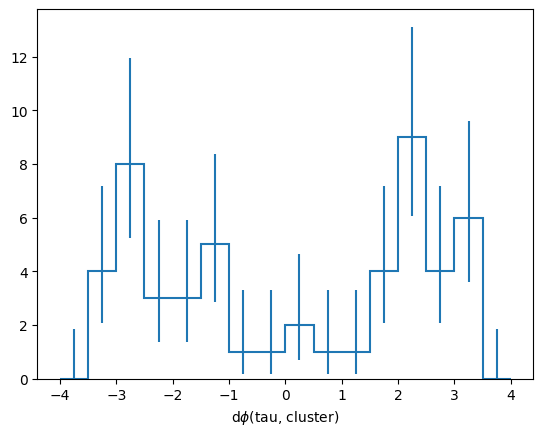

In [38]:
dPhiHist.plot()

In [39]:
cutflow_data, dPhiHist_data = Produce_Cutflow.makeCutflow(data_events, cfg_file='cuts_sensitivity_study.yaml', isMC=False)

1
computing delta Eta cartesian
tau event
cscCluster event
event event
computing delta Phi cartesian
tau event
cscCluster event
event event


In [40]:
cutflow_data

,Cut Name,Number of Events,Cut Efficiency,Cumulative Efficiency
0,Pass Trigger,7744760,1.000,1.000
1,MET>30 GeV,4064216,0.525,0.525
2,>160 rechits in CSC Cluster,1551694,0.382,0.200
3,MuonVetoPt<30GeV,1433327,0.924,0.185
4,JetVetoPt<30 GeV,896195,0.625,0.116
5,"|dPhi(cluster, MET)|<1.5",479843,0.535,0.062
6,>1 tau,479843,1.000,0.062
7,tauPt>30GeV,149227,0.311,0.019
8,tau pass looseID,12457,0.083,0.002
9,"|dEta(cluster, tau)|<2",7632,0.613,0.001


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f4ba38b80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

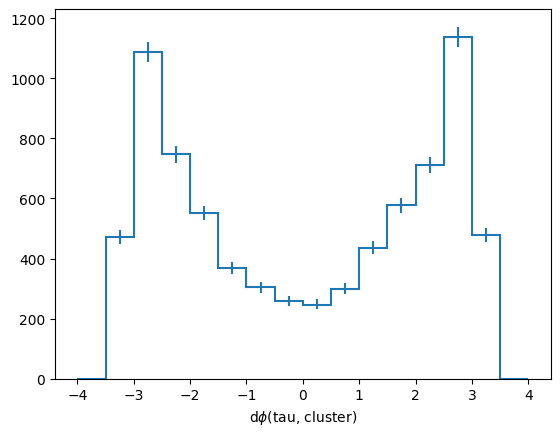

In [41]:
dPhiHist_data.plot()

[-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5  4. ]


Text(0, 0.5, 'fraction of events')

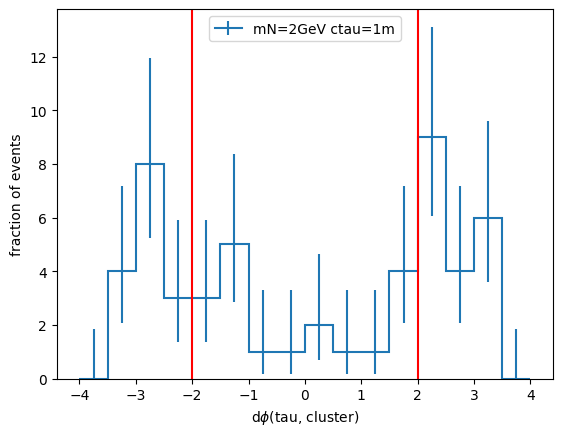

In [69]:
print(dPhiHist.axes[0].edges)
dPhiHist_scaled = dPhiHist.copy()

#dPhiHist_data_scaled = dPhiHist_data/dPhiHist_data.sum()
dPhiHist_scaled.plot(label="mN=2GeV ctau=1m")
#dPhiHist_data_scaled.plot(label="data")
#plt.hist(dPhiHist/dPhiHist.sum(), label="mN=2GeV ctau=1m")
plt.axvline(x=-2, color='red')
plt.axvline(x=2, color='red')
plt.legend()
plt.xlabel("d$\phi$(tau, cluster)")
plt.ylabel("fraction of events")

In [10]:
importlib.reload(MuonSystemReader)
importlib.reload(Produce_Cutflow)
#importlib.reload(Processing_Helpers)


<module 'Produce_Cutflow' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/Produce_Cutflow.py'>

In [17]:
dak.version

<module 'dask_awkward.version' from '/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/version.py'>